# 任意の確率分布に従う乱数を受理・棄却法で生成する

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.integrate
from scipy.stats import norm, uniform

In [17]:
np.random.seed()

## 正規化前の目標分布f

In [31]:
f = lambda x: np.exp(-x**2/ 2) * (np.sin(6*x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1)

## 正規化定数

In [32]:
inf = float('inf')
I = scipy.integrate.quad(f, -inf, inf)[0]

## 正規化済み(積分が1)の目標分布

In [33]:
f = lambda x: np.exp(-x**2/2) * (np.sin(6*x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1) / I

## 提案分布g

In [34]:
gv = norm(loc=0.0, scale=1.0)
g = gv.pdf

## 分布の上限をしていする定数Mを設定

In [35]:
xopt = scipy.optimize.fmin(lambda x: -f(x) / g(x), 0.0, disp=False)[0]

In [36]:
M = f(xopt) / g(xopt)
print("M={}".format(M))

M=1.8560697354710325


In [37]:
Nsim = 100000

## 提案分布gからの乱数Yを生成

In [38]:
Y = gv.rvs(size=Nsim)

## 一様乱数UをNsim個生成

In [39]:
U = uniform.rvs(size=Nsim)

In [40]:
X = Y[U <= f(Y) / (M * g(Y))]
print('サンプル数: {}=>{}'.format(len(Y), len(X)))
print('実際の受理率: {}'.format(len(X)/float(len(Y))))
print('理論的な受理率: {}'.format(1.0/M))

サンプル数: 100000=>53988
実際の受理率: 0.53988
理論的な受理率: 0.5387728601405273


## 目標分布を描画

In [41]:
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

## 提案分布を描画

In [42]:
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

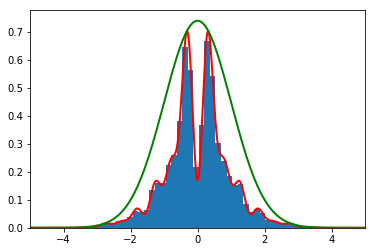

In [43]:
plt.hist(X, bins=50, normed=True)
plt.xlim((-5, 5))
plt.show()